In [1]:
# Import required packages
import numpy as np               # for mathematical operations, for arrays
import pandas as pd              # Used for different data manipulation tasks
import matplotlib.pyplot as plt  # Used for Plotting 
import random                    # For random number generator
import warnings
warnings.filterwarnings('ignore')# To avoid warnings note while running the notebook

# Section 1 : Implementing Gradient Descent

Gradient Descent is an first order optimization algorithm to find the local minimum differentiable function (usually a loss function or an objective function). We start with a random point on the function and move in the negative direction of the gradient of the function to reach the find minimum.

Let $F(x)$ be a differentiable function parameterised by $x$ and $x^*$ be the parameter value which minimises $F(x)$. The initial value is $x_0=a_0$. To determine $x^*$ using gradient descent, at each of the $i^{th}$ the parameter updation rule is:

\begin{align*}
x_i = x_{i-1} - \eta \nabla F(a_{i-1}), \hspace{1cm} i\geq 1
\end{align*}  
where $x_i$ is updated value of the parameter in the $i^{th}$ iteration. 

\begin{align*}
\eta \nabla F(a_{i-1}) = \eta \frac{dF}{dx}\bigr \rvert_{x=a_{i-1}}
\end{align*} 

**Stopping Criteria**: Following are three ways which are used as stopping criteria in gradient descent algorithm:
1. Limiting number of iterations
2. Threshold for change in the parameter (i.e difference between the updated parameter and parameter in the previous iteration) --> Change in parameter > Threshold
3. Threshold for change in gradient step
                  
**Question** : Find $x^*$ which minimises $F(x) = (x+5)^2$ using gradient descent 

**Note : Few variables are set to a given value, read the instructions in the pseudo code**

**Pseudo Code**:
1. Initialise the parameter ('x') with some random number,set learning rate = 0.01(section 4 has details on "how to select appropriate learning rate for a given problem"), set threshold = 0.000001,
2. Define a function for calculating differential of F (Hint : Use lambda method for single line of code)
3. Compute the updated value of the parameter using the formula: $x_i = x_i-1 - \eta \nabla F(a_{i-1})$ 
4. Iterate over step 3 until the stopping criteria is satisfied (You have to choose stopping criteria appropriately)

## 1.1 Implementing Code
Implement the above pseudo code and print the optimum value of $x$ and $F(x)$. Also print the number of iterations required to reach that optimum.

**Note : Carefully choose your stopping criteria for reaching optimum**

In [72]:
# Write your code here
def f_x(x) : 
    return (x+5)**2

def der_f_x(x) : 
    return 2*(x+5)

def descent(lr , threshold) :
    x = np.random.randn()
    
    while True :
        x_new = x - (lr * der_f_x(x))
        if np.abs(x_new - x) <= threshold : 
            return x_new
        x = x_new

x_opt = descent(1e-2 , 1e-6)
print('Optimal value of x is : ',x_opt)

Optimal value of x is :  -4.999951148720151


# Section 2 : Linear Regression - Finding the Regression parameters using Normal Equation (Analytical Approach)
**Dataset** : dataset1.csv (given)

Given a dataset (here dataset1.csv), find the coefficients (parameters) using the Normal Equation and predict the outputs for the same dataset (dataset1.csv). Given input features in matrix $X$ and observed output or target vector $y$, the regression parameters are given by the equation:
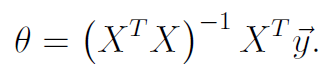


**Pseudo Code:**
1. Append ones to X, let say that as "X_appended" (This is to be done when there is intercept, if you know before hand that intercept is zero, then this step can be ignored)
2. Find the pseudo Inverse of the X_appended
3. Find the dot product of transpose of X_appended and target vector (y),
4. Find "theta" (parameters) using "Normal Equation" given above (i.e Matrix multiplication of outputs of Step 2 and Step 3)
5. Predict ouputs for X_new by appending it with ones and then using the formula $y=X_{new}\theta$

**Note : When you perform matrix multiplications or dot products on vectors or matrices, always keep track of the matrix or vectors shapes. This helps you in avoiding implementation errors.**

<div class="alert alert-block alert-warning">
**Implementation Note:** Step 1 is crucial. We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [74]:
# Import X, y from "dataset1.csv"
# X and y are numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array

dataset1 = pd.read_csv('dataset1.csv')

X = np.array(dataset1['X']).reshape(-1,1)
y = np.array(dataset1['y']).reshape(-1,1)

X_appended = np.concatenate([X , np.ones((X.shape[0],1))] , axis = 1)

theta = np.dot(np.linalg.pinv(np.dot(X_appended.T,X_appended)),np.dot(X_appended.T,y))
print('Optimal value of theta(2nd parameter is the intercept) : ',theta)

Optimal value of theta(2nd parameter is the intercept) :  [[ 4.90189099]
 [17.78924731]]


### 2.1 Function to predict the outputs
Implement the predict function below. Predict the outputs for the given data (dataset1.csv), plot the predicted outputs Vs input features and scatter plot for dataset1.csv (X,y)

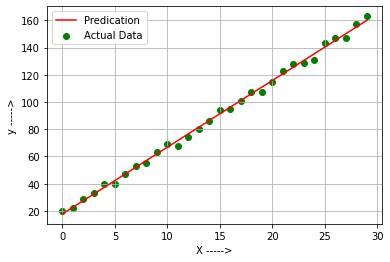

In [75]:
def predict(X, theta):
    """
    Predictions of X for a given theta.
    
    Parameters
    ----------
    X : array with size of (m x n)
    
    theta : array with size of (n+1, 1).
    
    Returns
    -------
    predictions : array of size (m x 1)
    
    """
    X_appended = X_appended = np.concatenate([X , np.ones((X.shape[0],1))] , axis = 1)
    prediction = np.dot(X_appended , theta)
    return prediction

# Your predictions for the dataset1.csv
predictions = predict(X,theta)


# plot a line Predictions Vs features and scatter plot for the training data X,y
plt.figure(0)
plt.plot(X,predictions,c='red',label='Predication')
plt.scatter(X,y,c='green',label ='Actual Data')
plt.grid()
plt.legend()
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.show()

# Section 3 : Linear Regression - Find the Regression parameters using Gradient Descent
This section is about applying gradient descent algorithm to find theta at which a cost function (Mean Squared Error) is minimum. This can be done using the gradient descent algorithm discussed in Section 1, where $x$ is replaced by the regression parameters. 

Refer to pseudo code in Section 1 for gradient descent algorithm. In simple terms, we initialise the regression parameters with some random number and we compute the gradient step to update the regression parameters.

### 3.1. Import and visualise the dataset

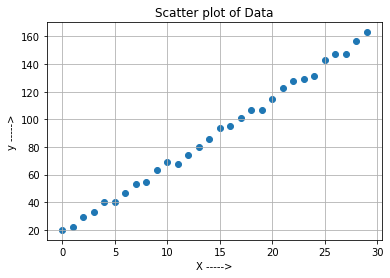

In [71]:
# Import the data from dataset1.csv - Same as Section 2
# Import X and y as numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array
dataset1 = pd.read_csv('dataset1.csv')

X = np.array(dataset1['X']).reshape((-1,1))
y = np.array(dataset1['y']).reshape((-1,1))
# Scatter Plot the data X and y for visualisation
plt.figure(1)
plt.title('Scatter plot of Data')
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.scatter(X,y)
plt.grid()
plt.show()

### 3.2. Compute Cost Function - Mean Squared Error (MSE) 
The cost function used is Mean Squared Error (MSE) represented as $J(\theta)$ and is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is a linear model given by: 
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. This way you can know whether you choose high learning rate or low learning rate. Suppose if your learning rate is too high, you can see your cost will go up and down, but will not converge. If you choose good learning rate, then you can see your cost going down smoothly and converges.

In this you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

In [8]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array with the shape of (m x n+1)
        where m is the number of examples,n is the number of features
        n+1 == n features + 1 for bias term(intercept as a feature)
    
    y : array with the shape of (m,1)
    
    theta : array with the shape of (n+1,1)
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # Write your code here
    
    J = np.sum((np.dot(X,theta) - y)**2)/(2*y.shape[0])
    
    return J

## 3.3. Implementation of Gradient Descent 

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Important implementation notes**

The function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a python list. If you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [57]:
def gradientDescent(X_appended, y, theta, alpha, precision = 0.001):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X_appended : array with shape of (m x n+1). Note : n+1 = n features + 1 intercept
    
    y : array with shape of (m, 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    precision : float, (One of the Stopping criteria). This is compared with the change in the cost from previous iter.
    
    Returns
    -------
    theta : array wih shape of (n+1,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    Count : Integer, Number of iterations taken to converge
    
    Cost : Float, Mean squared error at the end of the iteration
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Write your code here
    count = 0 
    J_history = []
    J_history.append(computeCost(X_appended , y , theta))
    
    while True :
        theta_new = theta - (alpha * ( np.sum((np.dot(X_appended,theta) - y) * X_appended , axis = 0))/y.shape[0]).reshape((-1,1))
        cost = computeCost(X_appended , y , theta_new)
        J_history.append(cost)
        if (np.abs(cost - J_history[-2]) < precision) or (cost == np.inf) or (cost == np.NaN) :
            count += 1
            theta = theta_new
            break
        theta = theta_new    
        count += 1
    return theta, J_history, cost, count

### Run gradientDescent function to train the model here
**Note : Use the learning rate(alpha) and precision given below. Initialise theta with zeros is suggested here (but you can initialise with different numbers)**

Print the final theta (learnt parameters), number of iterations to converge, value of cost function at the convergence.

In [58]:
# initialize fitting parameters with zeros
theta = np.zeros((2,1))

# Play with these setting to see how these parameters play a huge, for a decent converge use below parameters
precision = 0.000001
alpha = 0.001

##################################### Your Code here ########################################
X_appended = X_appended = np.concatenate([X , np.ones((X.shape[0],1))] , axis = 1)
a,b,c,d = gradientDescent(X_appended, y, theta, alpha, precision)
print('Theta optimal : ',a)
print('Number of iterations to converge : ',d)
print('Cost at convergence : ',c)

Theta optimal :  [[ 4.90802378]
 [17.6687466 ]]
Number of iterations to converge :  18995
Cost at convergence :  2.424134514167511


## 3.4. Plot the Training Curve
**Tip:** Initially the change in the loss(J) are drastic and dominating. So while plotting you may remove the first 10% of the iterations and then plot to see a smooth curve in the training process

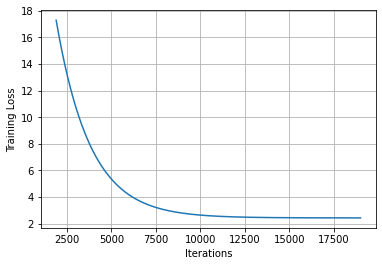

In [59]:
plt.figure(2)
ay = b[int(0.1*len(b)):]
ax = np.arange(len(ay)) + int(0.1*len(b))
plt.plot(ax,ay)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

## 3.5. Predict Outputs and Plot the results
Same as Step 5 in the Section 2. You can use the same function predict(X, theta)

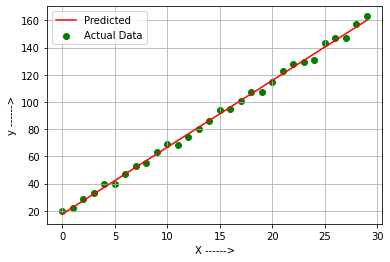

In [70]:
# plot a line for predictions and scatter plot for the training data X,y

predictions = predict(X,a)

plt.figure(0)
plt.plot(X,predictions,c='red',label='Predicted')
plt.scatter(X,y,c = 'green',label= 'Actual Data')
plt.xlabel('X ------>')
plt.ylabel('y ------>')
plt.legend()
plt.grid()
plt.show()

# Section 4 : Selecting appropriate learning rate
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞. So dont worry even if you cost as inf or NaN

**Repeat the training as in Section 3 with different values of alpha as listed below. Print the alpha, cost and number of iterations it took for every alpha**

In [61]:
theta = np.zeros((2,1))
precision = 0.000001

# You can change this set of alphas and try out different, but keep your range less than 1
alphas = [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01,0.03, 0.05, 0.07, 0.1, 0.3]

# Write your code here
for alpha in alphas:
    theta_opt , J_hist , cost_opt , iters = gradientDescent(X_appended, y, theta, alpha, precision)
    print('ALPHA : ',alpha,' COST : ',cost_opt,' ITERATIONS TO CONVERGE : ',iters)
    print('---------------------------------------------\n')

ALPHA :  0.0001  COST :  2.4413078221495095  ITERATIONS TO CONVERGE :  146029
---------------------------------------------

ALPHA :  0.0003  COST :  2.4285868952040355  ITERATIONS TO CONVERGE :  55663
---------------------------------------------

ALPHA :  0.0005  COST :  2.4260422656254055  ITERATIONS TO CONVERGE :  35347
---------------------------------------------

ALPHA :  0.0007  COST :  2.424951548553128  ITERATIONS TO CONVERGE :  26165
---------------------------------------------

ALPHA :  0.001  COST :  2.424134514167511  ITERATIONS TO CONVERGE :  18995
---------------------------------------------

ALPHA :  0.003  COST :  2.4228624540119243  ITERATIONS TO CONVERGE :  7029
---------------------------------------------

ALPHA :  0.005  COST :  2.4226074531485455  ITERATIONS TO CONVERGE :  4412
---------------------------------------------

ALPHA :  0.007  COST :  inf  ITERATIONS TO CONVERGE :  261806
---------------------------------------------

ALPHA :  0.01  COST :  inf  I

## Section 5: Questions on Analytical and Gradient Descent approaches

1. Are the results from both the analytical and gradient descent approach are same? If not, why?
2. When do u prefer analytical approach and gradient descent approach? Hint: Explain interms of size of the dataset
3. Can we use different cost function in place of MSE? If we do, where will be changes in the gradient descent step?(Just mention using words, equations are not required)
4. How does the initialisation of the parameters $\theta$ effects the convergence? In this case we initialised $\theta$ to zeros. What happens if we choose closer to solution and farther to solution?
5. Any drawbacks of Gradient descent that you could think of? Hint : Interms of Convergence rate.
6. What if number of features increases and how does it effect the gradient descent approach and analytical approach? Note:This might require some time to look for appropriate concepts. But do note that this difference is very important to understand.
7. Comment your observations on selecting appropriate learning rate.

**Write your answers in the following Markdown**

1. Yes, the results for the optimal theta while using both the gradient descent and analytical tend to approach the same values.


2. Owing to matrix computations in the analytical approach, we should consider the fact that it will be a bottleneck. If the dataset size is extremely large, then the matrix operations could take more time when compared to the gradient descent method. Therefore, if the dataset size is relatively small, analytical method is a better approach whereas if the dataset size is extremely large, then the gradient descent method could be benefitial.


3. Yes, we can use a different cost function in place of MSE. In the gradient descent, the steps which will change are the calculation of the gradient i.e. the step wherein we update the value of theta because the gradient would vary for a different loss function. 


4. The farther the initial theta parameters are from the point of convergence, the greater the number of steps it would take for the gradient descent to converge. For instance, in the above example if the theta was initialized to a point closer to the optimal theta than origin then it would have took lesser number of steps to converge and on the contrary would have took more number of steps to converge if we were to initialize it to a value farther away from optimal theta than the origin.


6. If the number of features of the data increased, we should consider the following for both the methods. When using the analytical approach, we would have to compute a matrix inverse wherein the shape of the matrix is the number of features of the data. Therefore, when the features in the dataset become very high in number, the computation of the inverse of the matrix could take more time than the time taken to descent through the loss curve. However, when the features are low in number, it would be more efficient to use the analytical approach as it would be a one time calculation unlike the gradient descent method which would have to compute the gradient repeatedly until convergence.


7. From the observations, we can see that too low of a learning rate would result in an extremely slow rate of convergence as seen in the case wherein alpha was extremely small such as 0.0001. As we increase the value of alpha, the rate at which we reach convergence increases thereby reducing the number of required iterations. However, after a certain value if we further increase alpha, it will result in divergence as the cost changes in the value of theta are too large for the selected alpha and the cost will explode to infinity. Hence, we should be extremely careful while choosing the learning rate so as to not pick too low or too high values.